# **Cereals Dataset**

In [76]:
import pandas as pd

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
    
def filter_cereals_by_manufacturer(cereal_dataset, manufacturer):
    if cereal_dataset is not None:
        return cereal_dataset.query(f'mfr == "{manufacturer}"').sort_values(by='rating', ascending=False).head(5)
    else:
        print("Dataset not loaded.")
        return None

load_data('cereal.csv')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


#### **Top 5 Kellog's Cereals By Ratings**

In [77]:
kg = filter_cereals_by_manufacturer(cereal_dataset=load_data('cereal.csv'), manufacturer='K')
kg.loc[:, ['name', 'calories', 'carbo', 'sugars', 'fiber', 'cups', 'rating']]

kg_calories_mean = kg['calories'].fillna(0).mean()
print("Average calorie content for Kellogg's top 5 cereals is", kg_calories_mean)
kg

Average calorie content for Kellogg's top 5 cereals is 80.0


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.0,0.80,58.345141
60,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6,110,25,3,1.0,0.50,55.333142


#### **Top 5 Quaker Oats Cereals By Ratings**

In [78]:
qo = filter_cereals_by_manufacturer(cereal_dataset=load_data('cereal.csv'), manufacturer='Q')
qo.loc[qo['name'] == 'Quaker Oatmeal', ['carbo', 'sugars']] = None
qo.loc[:, ['name', 'calories', 'carbo', 'sugars', 'fiber', 'cups', 'rating']]

qo_calories_mean = qo['calories'].fillna(0).mean()
print("Average calorie content for Quaker Oatmeal's top 5 cereals is", qo_calories_mean)
qo

Average calorie content for Quaker Oatmeal's top 5 cereals is 80.0


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50,0,3,0.5,1.00,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15,0,3,0.5,1.00,60.756112
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110,0,1,1.0,0.67,50.828392
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6.0,110,25,3,1.0,0.50,49.511874
41,Life,Q,C,100,4,2,150,2.0,12.0,6.0,95,25,2,1.0,0.67,45.328074


### **Kellogg's vs Quaker Oatmeal**

In [79]:
kgqo = pd.concat([kg, qo], ignore_index=True)

kgqo.loc[:, ['name', 'calories', 'carbo', 'sugars', 'fiber', 'cups', 'rating']].sort_values(by='rating', ascending=False)

print("\n----Comparison of Kellogg's and Quaker Oatmeal cereals----\n")
print("\n--Comparison of Kellogg's and Quaker Oatmeal cereals based on average ratings--\n")
print("Kellogg's cereals average rating:", kg['rating'].mean())
print("Quaker Oatmeal's cereals average rating:", qo['rating'].mean())
print("\n--Comparison of average calorie content--\n")
print("Kellogg's cereals average calories:", kg_calories_mean, "calories")
print("Quaker Oatmeal's cereals average calories:", qo_calories_mean, "calories")
print("\n--Comparison of average carbohydrate content--\n")
print("Kellogg's cereals average carbohydrates:", kg['carbo'].mean(), "grams")
print("Quaker Oatmeal's cereals average carbohydrates:", qo['carbo'].mean(), "grams")
print("\n--Comparison of average sugar content--\n")
print("Kellogg's cereals average sugars:", kg['sugars'].mean(), "grams")
print("Quaker Oatmeal's cereals average sugars:", qo['sugars'].mean(), "grams")
print("\n--Comparison of average fiber content--\n")
print("Kellogg's cereals average fiber:", kg['fiber'].mean(), "grams")
print("Quaker Oatmeal's cereals average fiber:", qo['fiber'].mean(), "grams")

print("\n--Comparison of average rating--\n")
if kg['rating'].mean() > qo['rating'].mean():
    print("\nKellogg's cereals have a higher average rating than Quaker Oatmeal's cereals.")
else:
    print("Quaker Oatmeal's cereals have a higher average rating than Kellogg's cereals.")

kgqo


----Comparison of Kellogg's and Quaker Oatmeal cereals----


--Comparison of Kellogg's and Quaker Oatmeal cereals based on average ratings--

Kellogg's cereals average rating: 65.2903074
Quaker Oatmeal's cereals average rating: 53.886019399999995

--Comparison of average calorie content--

Kellogg's cereals average calories: 80.0 calories
Quaker Oatmeal's cereals average calories: 80.0 calories

--Comparison of average carbohydrate content--

Kellogg's cereals average carbohydrates: 12.4 grams
Quaker Oatmeal's cereals average carbohydrates: 12.25 grams

--Comparison of average sugar content--

Kellogg's cereals average sugars: 4.0 grams
Quaker Oatmeal's cereals average sugars: 3.0 grams

--Comparison of average fiber content--

Kellogg's cereals average fiber: 6.2 grams
Quaker Oatmeal's cereals average fiber: 1.54 grams

--Comparison of average rating--


Kellogg's cereals have a higher average rating than Quaker Oatmeal's cereals.


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
1,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2.0,90,25,3,1.0,1.00,59.642837
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7.0,100,25,2,1.0,0.80,58.345141
4,Raisin Squares,K,C,90,2,0,0,2.0,15.0,6.0,110,25,3,1.0,0.50,55.333142
5,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50,0,3,0.5,1.00,63.005645
6,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15,0,3,0.5,1.00,60.756112
7,Quaker Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110,0,1,1.0,0.67,50.828392
8,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6.0,110,25,3,1.0,0.50,49.511874
9,Life,Q,C,100,4,2,150,2.0,12.0,6.0,95,25,2,1.0,0.67,45.328074


## **Kellogg's Cereals Bar Graphs and Pie Charts**


----Visualizations of Kellogg's cereals----



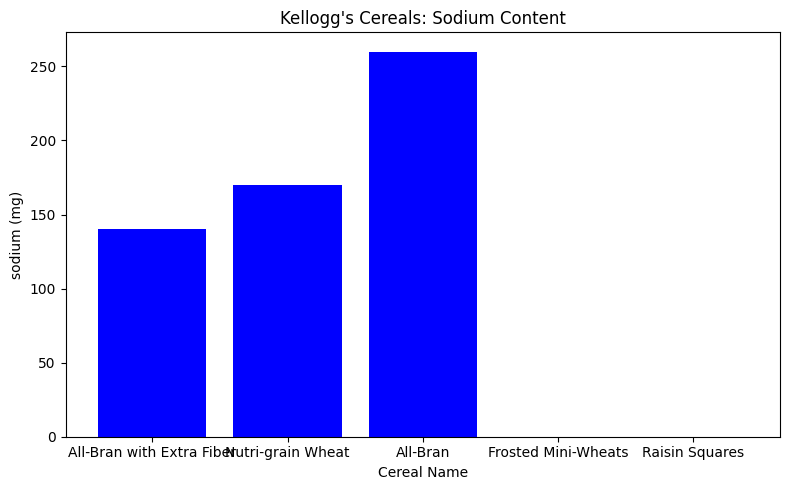

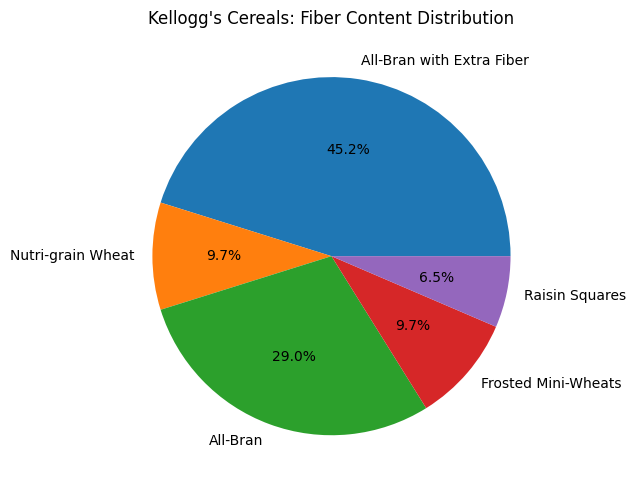

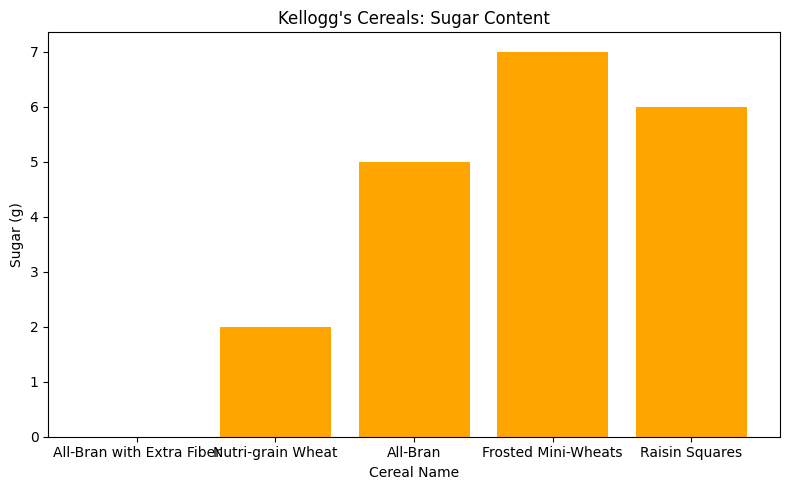

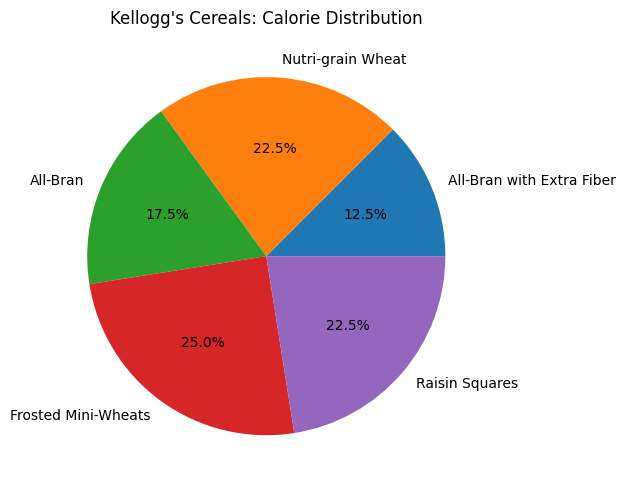

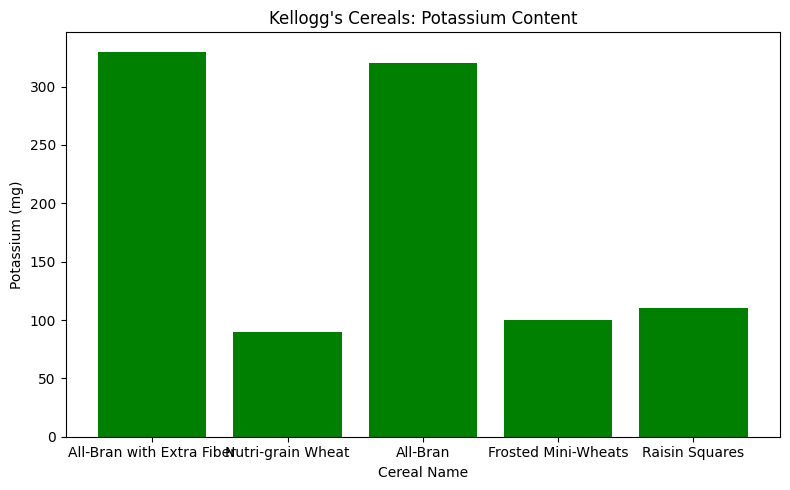

In [80]:
import matplotlib.pyplot as plt

print("\n----Visualizations of Kellogg's cereals----\n")

# Bar graph: Kellogg's cereals sodium content
plt.figure(figsize=(8,5))
plt.bar(kg['name'], kg['sodium'], color='blue')
plt.xlabel('Cereal Name')
plt.ylabel('sodium (mg)')
plt.title("Kellogg's Cereals: Sodium Content")
plt.tight_layout()
plt.show()

# Pie chart: Distribution of Kellogg's cereals by fiber content
fiber_labels = kg['name']
fiber_values = kg['fiber']

plt.figure(figsize=(8, 5))
plt.pie(fiber_values, labels=fiber_labels, autopct='%1.1f%%', startangle=360)
plt.title("Kellogg's Cereals: Fiber Content Distribution")
plt.tight_layout()
plt.show()

# Bar graph: Kellogg's cereals sugar content
plt.figure(figsize=(8,5))
plt.bar(kg['name'], kg['sugars'], color='orange')
plt.xlabel('Cereal Name')
plt.ylabel('Sugar (g)')
plt.title("Kellogg's Cereals: Sugar Content")
plt.tight_layout()
plt.show()

# Pie chart: Distribution of calories among Kellogg's cereals
calorie_labels = kg['name']
calorie_values = kg['calories']

plt.figure(figsize=(8, 5))
plt.pie(calorie_values, labels=calorie_labels, autopct='%1.1f%%', startangle=360)
plt.title("Kellogg's Cereals: Calorie Distribution")
plt.tight_layout()
plt.show()

# Bar graph: Kellogg's cereals potassium content
plt.figure(figsize=(8,5))
plt.bar(kg['name'], kg['potass'], color='green')
plt.xlabel('Cereal Name')
plt.ylabel('Potassium (mg)')
plt.title("Kellogg's Cereals: Potassium Content")
plt.tight_layout()
plt.show()

## **Quaker Oatmeal's Cereals Bar Graphs and Pie Charts**


----Visualizations of Quaker Oatmeal cereals----



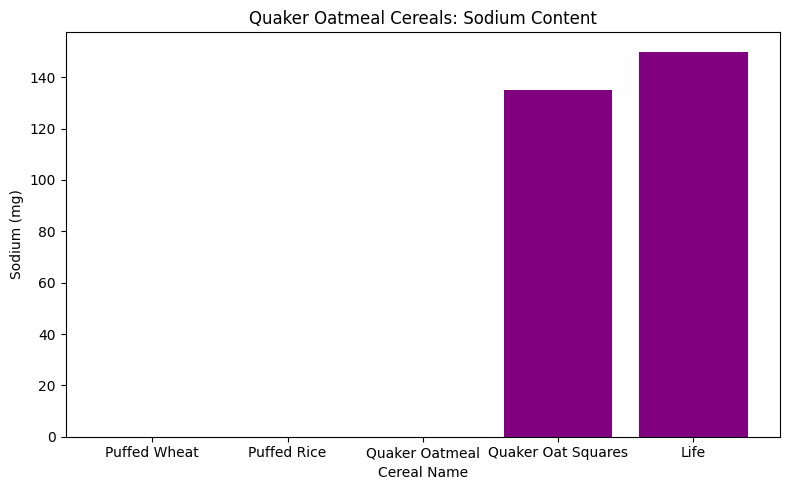

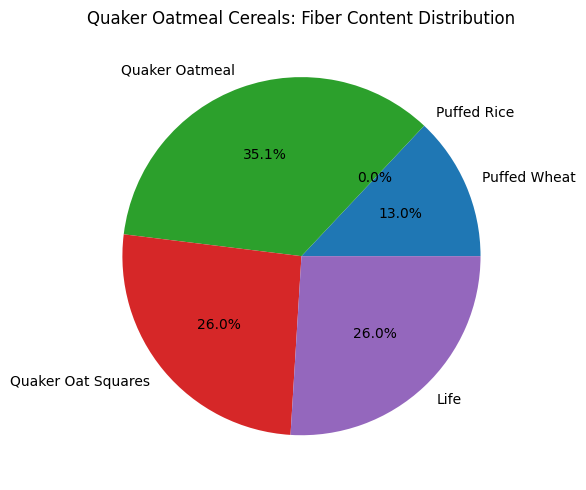

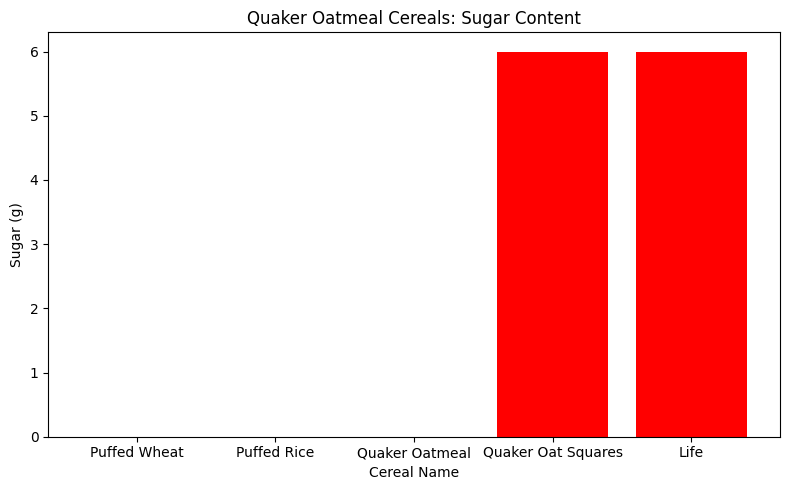

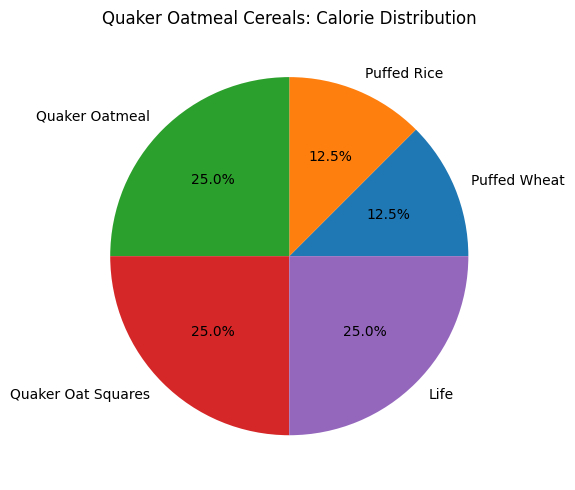

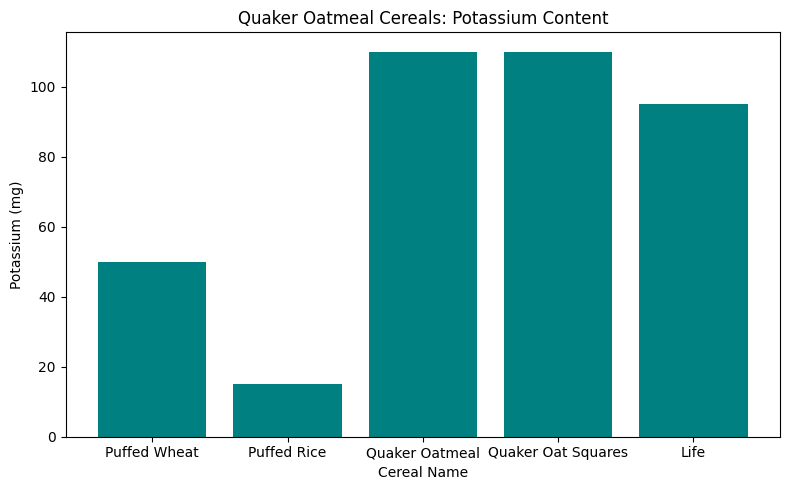

In [81]:
print("\n----Visualizations of Quaker Oatmeal cereals----\n")

# Bar graph: Quaker Oatmeal cereals sodium content
plt.figure(figsize=(8,5))
plt.bar(qo['name'], qo['sodium'], color='purple')
plt.xlabel('Cereal Name')
plt.ylabel('Sodium (mg)')
plt.title("Quaker Oatmeal Cereals: Sodium Content")
plt.tight_layout()
plt.show()

# Pie chart: Distribution of Quaker Oatmeal cereals by fiber content
qo_fiber_labels = qo['name']
qo_fiber_values = qo['fiber']

plt.figure(figsize=(8, 5))
plt.pie(qo_fiber_values, labels=qo_fiber_labels, autopct='%1.1f%%', startangle=360)
plt.title("Quaker Oatmeal Cereals: Fiber Content Distribution")
plt.tight_layout()
plt.show()

# Bar graph: Quaker Oatmeal cereals sugar content
plt.figure(figsize=(8,5))
plt.bar(qo['name'], qo['sugars'].fillna(0), color='red')
plt.xlabel('Cereal Name')
plt.ylabel('Sugar (g)')
plt.title("Quaker Oatmeal Cereals: Sugar Content")
plt.tight_layout()
plt.show()

# Pie chart: Distribution of calories among Quaker Oatmeal cereals
qo_calorie_labels = qo['name']
qo_calorie_values = qo['calories']

plt.figure(figsize=(8, 5))
plt.pie(qo_calorie_values, labels=qo_calorie_labels, autopct='%1.1f%%', startangle=360)
plt.title("Quaker Oatmeal Cereals: Calorie Distribution")
plt.tight_layout()
plt.show()

# Bar graph: Quaker Oatmeal cereals potassium content
plt.figure(figsize=(8,5))
plt.bar(qo['name'], qo['potass'], color='teal')
plt.xlabel('Cereal Name')
plt.ylabel('Potassium (mg)')
plt.title("Quaker Oatmeal Cereals: Potassium Content")
plt.tight_layout()
plt.show()